In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.animation as ani
from collections import deque

ZADANIE 1 - algorytm Leatha

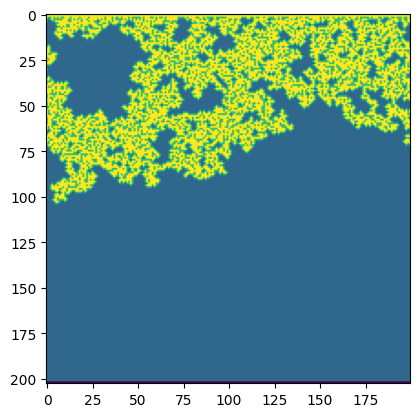

In [17]:
def friends_to_queue(cord, deque, net_size, net):
    '''Function adds coordinates of 'cord' point to the queue, provided they are not tested yet.'''

    suspects = [cord + np.array([1, 0]), cord + np.array([-1, 0]), cord + np.array([0, -1]), cord + np.array([0, 1])] # up, down, left, right
    for s in suspects:
        if s[1] == 0: 
            s[1] = net_size
        if s[1] == net_size: 
            s[1] = 0
    for s in suspects:
        if net[s[0], s[1]] == -1:
            net[s[0], s[1]] = -3
            deque.append(s)

def whats_that(prob):
    '''Function determines, if an untested point is 'filled' (with probability p) or 'empty' (with probability 1-p).'''

    return np.random.choice(a = [0, 1], size = 1, p = [1 - prob, prob])

def net_generator(net_size, p):
    '''Creates square array of size 'net_size'^2 representing a percolating surface.'''
    
    # we create net

    net = np.ones([net_size + 3, net_size]) * (-1)

    # add border conditions

    net[0, :] = net[0, :] * 2
    net[net_size + 2, :] = net[net_size + 2, :] * 2
    net[1, :] = net[1, :] * (-1)

    # list of 'boxes' to test starting with 'second' row

    queue = deque([[2, i] for i in range(net_size)])

    # numerical calculations

    while(len(queue) > 0):
        Q = queue[0]
        X = whats_that(p)
        net[Q[0], Q[1]] = X
        if X == 1:
            friends_to_queue(Q, queue, net_size, net)
        queue.popleft()

    return net

plt.imshow(net_generator(200, 0.58))
plt.show()

ZADANIE 2

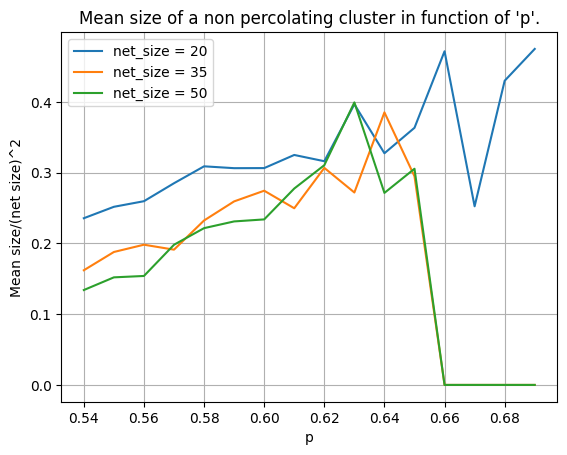

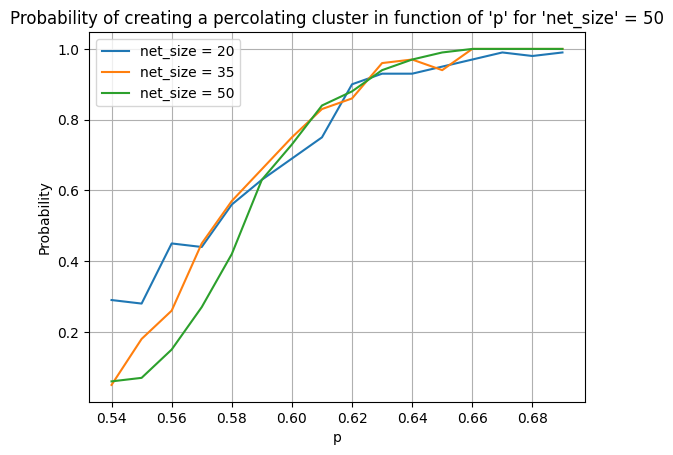

Because of exception occurrence for net_size = 20 unable to create a net in 7 cases out of 1600.
Because of exception occurrence for net_size = 35 unable to create a net in 8 cases out of 1600.
Because of exception occurrence for net_size = 50 unable to create a net in 0 cases out of 1600.


In [24]:
def net_test(net):
    '''Function returns tuple with statistics considering a percolating net. First output value is boolean, True if 'water' reached end of the net. Second value is size of 
    'wet' cluster'''

    net_size = len(net[0,:])
    wet = any(net[net_size + 1, :] == 1)
    cluster_size = np.sum(net == 1)
    return wet, cluster_size

# for three shapes of net we calculate mean attributes for several probabilities

all_mean_sizes = []
all_probabilities = []
all_fails = []

for net_size in 20, 35, 50:

    mean_sizes = []
    probability = []
    failed = 0
    for prb in np.arange(0.54, 0.70, 0.01):
        clusters = []
        for i in range(100):
            try:
                some_net = net_generator(net_size, prb)
            except:
                failed += 1
                continue
            if net_test(some_net)[0] == False: # so the case when, water hasn't reach bottom of net - non percolating cluster
                clusters.append(net_test(some_net)[1])
        if len(clusters) == 0:
            mean_sizes.append(0)
        else:
            mean_sizes.append(np.mean(clusters))
        probability.append(1 - len(clusters) / 100)

    mean_sizes = np.array(mean_sizes) / (net_size)**2
    all_mean_sizes.append(mean_sizes)
    all_probabilities.append(probability)
    all_fails.append(failed)

# let's print first graph

descr = []
for n, size in enumerate([20, 35, 50]):
    plt.plot(np.arange(0.54, 0.70, 0.01), all_mean_sizes[n])
    descr.append('net_size = %i' %size)
plt.title('Mean size of a non percolating cluster in function of \'p\'.')
plt.xlabel('p')
plt.ylabel('Mean size/(net size)^2')
plt.legend(descr)
plt.grid()
plt.show()

# let's print second graph

descr = []
for n, size in enumerate([20, 35, 50]):
    plt.plot(np.arange(0.54, 0.70, 0.01), all_probabilities[n])
    descr.append('net_size = %i' %size)
plt.title('Probability of creating a percolating cluster in function of \'p\' for \'net_size\' = %i' %net_size)
plt.xlabel('p')
plt.ylabel('Probability')
plt.legend(descr)
plt.grid()
plt.show()

# and we print number of failed net creations

for n, size in enumerate([20, 35, 50]):
    print("Because of exception occurrence for net_size = " + str(size) + " unable to create a net in " + str(all_fails[n]) + " cases out of 1600.")

ZADANIE 3

In [27]:
def corr_length(net):
    '''Calculates the length of correlation for any percolating net.'''

    wet_places = []
    for i in range(len(net[0, :])):
        for j in range(2, len(net[0, :] + 2)):
            if net[i, j] == 1:
                wet_places.append(np.array([i, j]))

    cent1 = np.mean([w[0] for w in wet_places])
    cent2 = np.mean([w[1] for w in wet_places])

    R1 = np.mean([(cent1 - w[0])**2 for w in wet_places])
    R2 = np.mean([(cent2 - w[1])**2 for w in wet_places])

    return np.sqrt(2 * (R1 + R2))

print('Correlation length has been calculated for several sizes of nets created with \'p\' = 0.6.')
for size in range(10, 110, 10):
    print('Size = %i       correlation length = ' %size + str (corr_length(net_generator(size, 0.60))))
    

Correlation length has been calculated for several sizes of nets created with 'p' = 0.6.
Size = 10       correlation length = 3.7146481813371115
Size = 20       correlation length = 10.588861103206906
Size = 30       correlation length = 16.495789324976666
Size = 40       correlation length = 22.09459330716861
Size = 50       correlation length = 19.012010089140908
Size = 60       correlation length = 23.909892951524622
Size = 70       correlation length = 39.363726553612054
Size = 80       correlation length = 33.10074758487416
Size = 90       correlation length = 37.39824367927012
Size = 100       correlation length = 54.19270331434283
